In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-creating the image

In [53]:
df = pd.DataFrame(
    {
        "TurbineId": ["T1", "T2", "T3"],
        "Easting": [10, 20, 30],
        "Northing": [20, 15, 20],
        "RotorDiameter": [150, 120, 200],
        "PoP": [120, 95, 110],
    }
)

df["size"] = df["RotorDiameter"] * 10  # creating a variable proportional to RD

<AxesSubplot:xlabel='Easting', ylabel='Northing'>

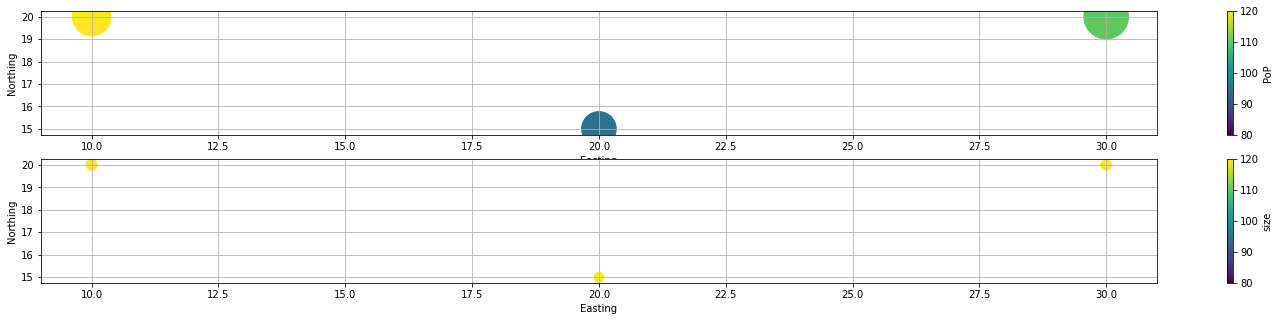

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(25, 5))  # setting up the figure

df.plot.scatter(
    x="Easting",
    y="Northing",  # set x and y
    s="size",  # use size as size
    c="PoP",  # use PoP to color
    cmap="viridis",  # color map, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=80,
    vmax=120,  # centering color to 100
    grid=True,  # add grid
    ax=axes[0],  # draw on axes object previously setup
)
df.plot.scatter(
    x="Easting",
    y="Northing",  # set x and y
    s="PoP",  # use size as size
    c="size",  # use PoP to color
    cmap="viridis",  # color map, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    vmin=80,
    vmax=120,  # centering color to 100
    grid=True,  # add grid
    ax=axes[1],  # draw on axes object previously setup
)
# ax.axis('equal')  # equal axis aspect ratio

### Extending the view

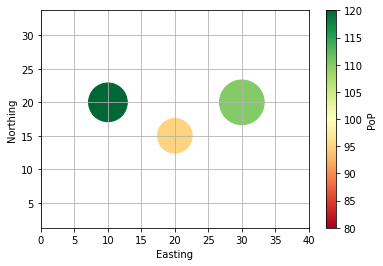

In [55]:
xmin = df["Easting"].min()
xmax = df["Easting"].max()
ymin = df["Northing"].min()
ymax = df["Northing"].max()

extend_multiplier = 0.5
x_extend = (xmax - xmin) * extend_multiplier
y_extend = (ymax - ymin) * extend_multiplier

ax.set_xlim(xmin - x_extend, xmax + x_extend)
ax.set_ylim(ymin - y_extend, ymax + y_extend)

fig  # show the amended figure

### Adding Text

In [ ]:
for _, row in df.iterrows():
    ax.text(
        x=row["Easting"],
        y=row["Northing"],
        s=row["TurbineId"],
        ha="center",
        va="center",
        size="medium",
        weight="semibold",
    )

fig  # show the amended figure

## need interactivity?
you can use a library like ***[plotly](https://plotly.com/)***: 

- install it using `pip install plotly`
- if using jupyterlab you also need to install the extension via `jupyter labextension install jupyterlab-plotly`

see https://plotly.com/python/ for more details on further customization

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Easting",
    y="Northing",
    color="PoP",
    size="size",
    text="TurbineId",
    width=500,
    height=500,
)

fig.update_traces(textposition="top center")

# Working with Json
I've saved the data into a file called `wtg.json`

In [49]:
import os

In [46]:
f = Path(".").parent / "wtg.json"

In [51]:
print(os.path.join("agrgra", "nn"))

agrgra\nn


In [20]:
from sample import root

In [34]:
fld = root / "outputs"

if not fld.exists():
    fld.mkdir()

In [74]:
import json

with open("wtg.json") as f:
    data = json.load(f)

data

{'objects': {'93898BB7805': {'points': {'ActivePower': [{'objectId': '93898BB7805',
      'pointName': 'ActivePower',
      'aggregate': 'TIMEAVERAGE',
      'timeSeries': [{'t': 1634050402953,
        'q': 524480,
        'v': -23.4,
        't_local': '2021-10-12T15:53:22.9533107+01:00'},
       {'t': 1634051002953,
        'q': 524352,
        'v': -23.1,
        't_local': '2021-10-12T16:03:22.9533107+01:00'}],
      'from': '2021-10-12T14:53:22.9533107Z',
      'to': '2021-10-12T15:13:22.9533107Z',
      'interval': '10m',
      'resultId': 0,
      'isHdaCompatible': True}],
    'WindSpeed': [{'objectId': '93898BB7805',
      'pointName': 'WindSpeed',
      'aggregate': 'TIMEAVERAGE',
      'timeSeries': [{'t': 1634050402953,
        'q': 524480,
        'v': 2.72,
        't_local': '2021-10-12T15:53:22.9533107+01:00'},
       {'t': 1634051002953,
        'q': 524352,
        'v': 2.84,
        't_local': '2021-10-12T16:03:22.9533107+01:00'}],
      'from': '2021-10-12T14:53:22.

In [101]:
for i in d.items():
    print(i)

('a', 1)
('b', 2)


In [99]:
d = {"a": 1, "b": 2}
for k, v in d.items():
    print(f"{k} has the value of {v}")

a has the value of 1
b has the value of 2


In [79]:
dfs = []
for obj_data in data["objects"].values():
    for col_values in obj_data["points"].values():
        df = pd.json_normalize(col_values, "timeSeries", ["pointName", "objectId"])
        dfs.append(df)

In [80]:
comb_df = pd.concat(dfs)
comb_df["timestamp_utc"] = pd.to_datetime(comb_df["t"], unit="ms")
comb_df = comb_df.set_index("timestamp_utc")
comb_df

,t,q,v,t_local,pointName,objectId
timestamp_utc,,,,,,
2021-10-12 14:53:22.953,1634050402953,524480,-23.40,2021-10-12T15:53:22.9533107+01:00,ActivePower,93898BB7805
2021-10-12 15:03:22.953,1634051002953,524352,-23.10,2021-10-12T16:03:22.9533107+01:00,ActivePower,93898BB7805
2021-10-12 14:53:22.953,1634050402953,524480,2.72,2021-10-12T15:53:22.9533107+01:00,WindSpeed,93898BB7805
2021-10-12 15:03:22.953,1634051002953,524352,2.84,2021-10-12T16:03:22.9533107+01:00,WindSpeed,93898BB7805
2021-10-12 14:53:22.953,1634050402953,524480,-21.00,2021-10-12T15:53:22.9533107+01:00,ActivePower,93898BA002
2021-10-12 15:03:22.953,1634051002953,524352,-21.00,2021-10-12T16:03:22.9533107+01:00,ActivePower,93898BA002
2021-10-12 14:53:22.953,1634050402953,524480,2.91,2021-10-12T15:53:22.9533107+01:00,WindSpeed,93898BA002
2021-10-12 15:03:22.953,1634051002953,524352,2.78,2021-10-12T16:03:22.9533107+01:00,WindSpeed,93898BA002


In [ ]:
comb_df.groupby(["pointName", "objectId", pd.Grouper(freq="10min")]).mean().unstack(0)

In [64]:
class Dog:  # class (cookie-cutter)
    scientific_species = "Canis lupus"  # class attribute (all instances automatically have the same value)

    def __init__(self, name):  # magic method
        self.name = name  # instance attribute (each instance will get a different name)

    def bark(self):  # method
        myname = self.name  # accessing instance attribute with `self`
        print(f"{myname}: woof")


a = Dog(name="fido")  # instance (actual cookie)
print(a.scientific_species)

b = Dog("dido")  # instance (actual cookie)
b.scientific_species = "aaa"
print(b.scientific_species)
print(a.scientific_species)

Canis lupus
aaa
Canis lupus


In [71]:
def myfunc():
    return "hello"


b.last_name = myfunc

In [72]:
b.last_name()

'hello'